In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pacswg

In [2]:
# TODO: measurements are once every 30 seconds, convert them to time

In [3]:
service_name = 'bentoml-keras-toxic-comments'
exp_name = 'res-2021-06-28_22-09-08'
slo_timeout = 500

exp_folder = f'results/trace2/{service_name}'
exp_proxy_filename = f'{exp_folder}/{exp_name}_proxy.csv'
exp_reqs_filename = f'{exp_folder}/{exp_name}_reqs.csv'

In [4]:
df_proxy_stats = pd.read_csv(exp_proxy_filename, index_col=0, parse_dates=True)
df_res = pd.read_csv(exp_reqs_filename, index_col=0, parse_dates=True)

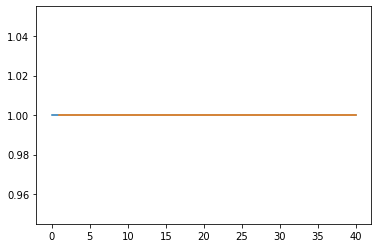

In [5]:
plt.plot(df_proxy_stats['averageMaxBufferSize'])
plt.plot(df_proxy_stats['averageActualBatchSize'])

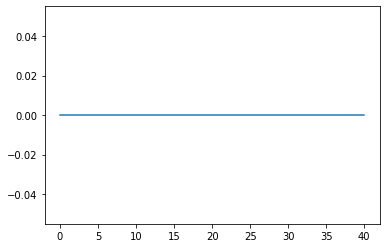

In [6]:
plt.plot(df_proxy_stats['averageTimeoutRatio'])

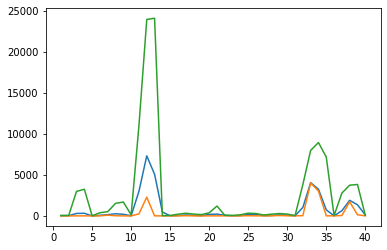

In [7]:
plt.plot(df_proxy_stats['reponseTimeAverage'])
plt.plot(df_proxy_stats['reponseTimeP50'])
plt.plot(df_proxy_stats['reponseTimeP95'])

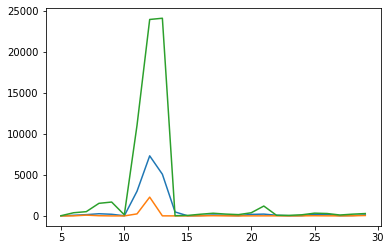

In [8]:
plt.plot(df_proxy_stats['reponseTimeAverage'][5:30])
plt.plot(df_proxy_stats['reponseTimeP50'][5:30])
plt.plot(df_proxy_stats['reponseTimeP95'][5:30])

7.487804878048781


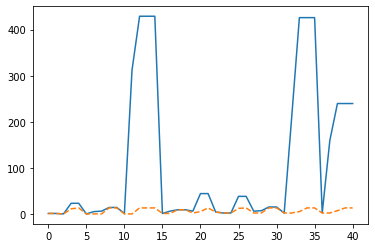

In [9]:
plt.plot(df_proxy_stats['currentReplicaCount'])
plt.plot(df_proxy_stats['currentReadyReplicaCount'], ls='--')
print(df_proxy_stats['currentReadyReplicaCount'].mean())

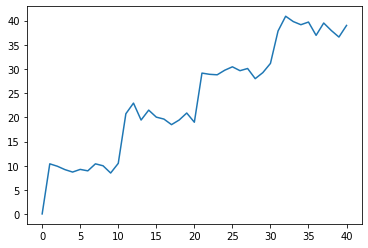

In [10]:
plt.plot(df_proxy_stats['averageArrivalRate'])

## Other Useful Plots

In [11]:
df_res['received_at'] = pd.to_datetime(df_res['received_at'])
df_res['response_at'] = pd.to_datetime(df_res['response_at'])

In [12]:
# get a temporal data of means
temp_df = df_res.set_index('received_at').resample('T').mean()
temp_df.head()

,response_time_ms,queue_position,upstream_response_time,upstream_request_count,response_time_ms_server,queue_time_ms
received_at,,,,,,
2021-06-28 21:49:00-04:00,56.206628,0.0,54.020561,1.0,54.108411,0.087850
2021-06-28 21:50:00-04:00,360.593552,0.0,357.975089,1.0,358.110320,0.135231
2021-06-28 21:51:00-04:00,118.244996,0.0,115.996473,1.0,116.084656,0.088183
2021-06-28 21:52:00-04:00,315.514029,0.0,312.978723,1.0,313.085106,0.106383
2021-06-28 21:53:00-04:00,56.230915,0.0,54.092150,1.0,54.199659,0.107509


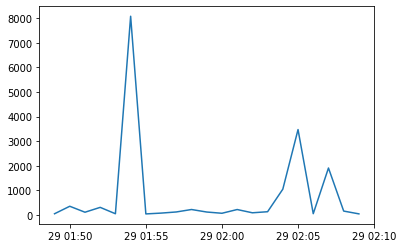

In [13]:

plt.plot(temp_df['upstream_response_time'])

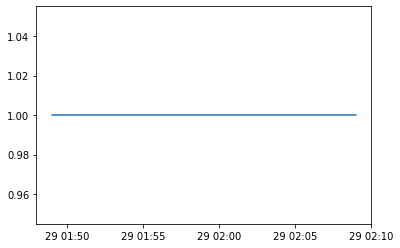

In [14]:
plt.plot(temp_df['upstream_request_count'])

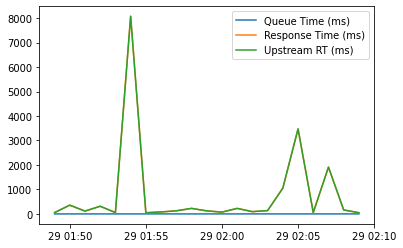

In [15]:
plt.plot(temp_df['queue_time_ms'], label='Queue Time (ms)')
plt.plot(temp_df['response_time_ms_server'], label='Response Time (ms)')
plt.plot(temp_df['upstream_response_time'], label='Upstream RT (ms)')

plt.legend()

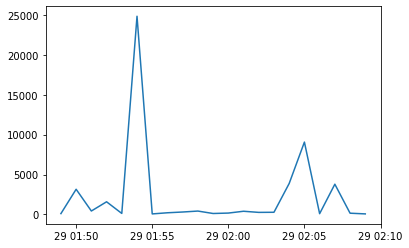

In [16]:
df_resample = df_res.set_index('received_at').resample('T')
p95_over_time = df_resample['response_time_ms_server'].quantile(0.95)
plt.plot(p95_over_time)

Text(0.5, 0, 'Time')

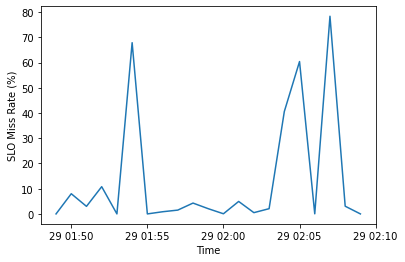

In [17]:
# SLO miss rate
slo_miss_count = df_resample['response_time_ms_server'].apply(lambda x: np.sum(x > slo_timeout))
resampled_request_count = df_resample['response_time_ms_server'].apply(lambda x: len(x))
slo_miss_rates = slo_miss_count / resampled_request_count * 100
plt.plot(slo_miss_rates)
plt.ylabel('SLO Miss Rate (%)')
plt.xlabel('Time')